# Multiple Linear Regression - II

## Source the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ipl=pd.read_csv('https://raw.githubusercontent.com/Foridur3210/IPL-Dataset-Player-price-prediction/master/IPL%20IMB381IPL2013.csv')
ipl

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


## Preprocess the data

In [3]:
# Target

y = ipl['SOLD PRICE']
y

0        50000
1        50000
2       350000
3       850000
4       800000
        ...   
125     750000
126     225000
127    1800000
128     450000
129     110000
Name: SOLD PRICE, Length: 130, dtype: int64

In [4]:
x=ipl.drop(['SOLD PRICE'], axis = 1)
x

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000


In [5]:
# Drop irrelevant features

x_1 = x.drop(['Sl.NO.','PLAYER NAME','TEAM'], axis = 1)
x_1

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,...,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE
0,2,SA,Allrounder,0,0,0,0.00,0,0.0,0,...,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000
1,2,BAN,Bowler,214,18,657,71.41,185,37.6,0,...,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000
2,2,IND,Bowler,571,58,1269,80.62,288,32.9,0,...,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000
3,1,IND,Bowler,284,31,241,84.56,51,36.8,0,...,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000
4,2,IND,Batsman,63,0,79,45.93,0,0.0,0,...,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,IND,Batsman,0,0,0,0.00,0,0.0,0,...,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000
126,2,PAK,Batsman,6398,7,6814,75.78,3,86.6,1,...,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000
127,2,IND,Batsman,1775,9,8051,87.58,109,44.3,1,...,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000
128,2,IND,Bowler,1114,288,790,73.55,278,35.4,0,...,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000


In [6]:
# Converting categorical variable to numerical using one hot encoding

x_1 = pd.get_dummies(x_1,columns=['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP'])


In [7]:
x_1.shape

(130, 37)

In [8]:
# Import stats model to add constant 1

import statsmodels.api as sm

x_1=sm.add_constant(x_1)
x_1

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Allrounder,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_0,CAPTAINCY EXP_1
0,1.0,0,0,0,0.00,0,0.0,0,0,0.00,...,1,0,0,0,1,0,0,0,1,0
1,1.0,214,18,657,71.41,185,37.6,0,0,0.00,...,0,0,0,0,0,0,1,0,1,0
2,1.0,571,58,1269,80.62,288,32.9,167,39,18.56,...,0,0,0,0,0,0,1,0,1,0
3,1.0,284,31,241,84.56,51,36.8,58,11,5.80,...,0,0,0,0,0,0,1,0,1,0
4,1.0,63,0,79,45.93,0,0.0,1317,71,32.93,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.0,0,0,0,0.00,0,0.0,49,16,9.80,...,0,0,0,0,0,1,0,0,1,0
126,1.0,6398,7,6814,75.78,3,86.6,3,3,3.00,...,0,0,0,0,0,1,0,0,0,1
127,1.0,1775,9,8051,87.58,109,44.3,1237,66,26.32,...,0,0,0,0,0,1,0,0,0,1
128,1.0,1114,288,790,73.55,278,35.4,99,23,9.90,...,0,0,0,0,0,0,1,0,1,0


## Spliting data into train and test

In [9]:
from sklearn.model_selection import train_test_split

x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y,test_size=0.2,random_state=10)

## Building the model

In [10]:
mlr_1=sm.OLS(y_train_1,x_train_1)

In [11]:
mlr_1=mlr_1.fit()

In [12]:
mlr_1.params

const                     -4.030794e+07
T-RUNS                    -3.642910e+01
T-WKTS                    -7.924946e+02
ODI-RUNS-S                 1.524333e+01
ODI-SR-B                  -1.061064e+03
ODI-WKTS                   1.649076e+03
ODI-SR-BL                 -1.044786e+03
RUNS-S                     1.805545e+02
HS                        -2.881482e+03
AVE                        5.848201e+03
SR-B                      -6.373365e+01
SIXERS                     3.016505e+03
RUNS-C                     1.745518e+02
WKTS                      -1.364873e+03
AVE-BL                     1.169297e+04
ECON                      -3.327271e+03
SR-BL                     -1.669414e+04
AUCTION YEAR               4.406899e+04
BASE PRICE                 1.888119e+00
AGE_1                     -1.329211e+07
AGE_2                     -1.347979e+07
AGE_3                     -1.353603e+07
COUNTRY_AUS               -4.453859e+06
COUNTRY_BAN                1.058876e-07
COUNTRY_ENG               -4.916729e+06


## Diagonsting the model

In [13]:
mlr_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
===============================================================================================
Model:                        OLS                       Adj. R-squared:              0.503     
Dependent Variable:           SOLD PRICE                AIC:                         2941.3368 
Date:                         2022-10-12 08:50          BIC:                         3028.6017 
No. Observations:             104                       Log-Likelihood:              -1437.7   
Df Model:                     32                        F-statistic:                 4.257     
Df Residuals:                 71                        Prob (F-statistic):          1.92e-07  
R-squared:                    0.657                     Scale:                       8.7185e+10
-----------------------------------------------------------------------------------------------
                            Coef.         Std.Err.      t    P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------------------
const                   -40307939.2680 24745537.1104 -1.6289 0.1078 -89649138.8629 9033260.3268
T-RUNS                        -36.4291       26.8420 -1.3572 0.1790       -89.9505      17.0923
T-WKTS                       -792.4946      566.6974 -1.3984 0.1663     -1922.4571     337.4678
ODI-RUNS-S                     15.2433       28.6606  0.5319 0.5965       -41.9042      72.3909
ODI-SR-B                    -1061.0636     1450.3045 -0.7316 0.4668     -3952.8887    1830.7615
ODI-WKTS                     1649.0764      742.0599  2.2223 0.0295       169.4510    3128.7018
ODI-SR-BL                   -1044.7855     1686.6499 -0.6194 0.5376     -4407.8700    2318.2989
RUNS-S                        180.5545      163.9192  1.1015 0.2744      -146.2911     507.4002
HS                          -2881.4824     2458.9831 -1.1718 0.2452     -7784.5555    2021.5907
AVE                          5848.2011     7729.2484  0.7566 0.4518     -9563.4825   21259.8847
SR-B                          -63.7337     1172.4877 -0.0544 0.9568     -2401.6078    2274.1405
SIXERS                       3016.5046     3549.7471  0.8498 0.3983     -4061.4900   10094.4993
RUNS-C                        174.5518      249.3836  0.6999 0.4863      -322.7049     671.8085
WKTS                        -1364.8732     6016.5118 -0.2269 0.8212    -13361.4570   10631.7107
AVE-BL                      11692.9682     9725.7685  1.2023 0.2333     -7699.6634   31085.5997
ECON                        -3327.2705     9459.2777 -0.3517 0.7261    -22188.5345   15533.9934
SR-BL                      -16694.1378    13373.3174 -1.2483 0.2160    -43359.7753    9971.4997
AUCTION YEAR                44068.9932    27027.4095  1.6305 0.1074     -9822.1308   97960.1171
BASE PRICE                      1.8881        0.5338  3.5374 0.0007         0.8238       2.9524
AGE_1                   -13292113.0553  8254614.0242 -1.6103 0.1118 -29751345.9395 3167119.8289
AGE_2                   -13479794.4048  8248893.0973 -1.6341 0.1067 -29927620.0848 2968031.2752
AGE_3                   -13536031.8079  8242925.8285 -1.6421 0.1050 -29971959.0919 2899895.4761
COUNTRY_AUS              -4453859.2110  2771303.9943 -1.6071 0.1125  -9979682.4296 1071964.0077
COUNTRY_BAN                     0.0000        0.0000  1.6325 0.1070        -0.0000       0.0000
COUNTRY_ENG              -4916729.1145  2814659.3130 -1.7468 0.0850 -10529000.3832  695542.1542
COUNTRY_IND              -4303342.1687  2779116.7278 -1.5485 0.1260  -9844743.5355 1238059.1981
COUNTRY_NZ               -4374144.4751  2745138.4899 -1.5934 0.1155  -9847795.1598 1099506.2096
COUNTRY_PAK              -4496219.1253  2721433.5914 -1.6522 0.1029  -9922603.5848  930165.3343
COUNTRY_SA               -4395566.7734  2763070.5940 -1.5908 0.1161  -9904973.0580 1113839.5112
COUNTRY_SL               -4486192.4631  2731080

## Multi-collinearity using VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def var_inf_factor(data):
    vif=pd.DataFrame()
    vif['Feature']=data.columns
    vif['VIF_Value']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    print(vif)

In [15]:
var_inf_factor(x_1)

                    Feature  VIF_Value
0                     const   0.000000
1                    T-RUNS   9.233542
2                    T-WKTS   6.522453
3                ODI-RUNS-S  11.067128
4                  ODI-SR-B   1.703841
5                  ODI-WKTS   7.048664
6                 ODI-SR-BL   1.707550
7                    RUNS-S   9.948044
8                        HS   8.602278
9                       AVE   7.467939
10                     SR-B   2.293498
11                   SIXERS   6.425581
12                   RUNS-C  22.310115
13                     WKTS  20.896087
14                   AVE-BL  45.182628
15                     ECON   2.981483
16                    SR-BL  45.596075
17             AUCTION YEAR   1.508571
18               BASE PRICE   3.347050
19                    AGE_1        inf
20                    AGE_2        inf
21                    AGE_3        inf
22              COUNTRY_AUS        inf
23              COUNTRY_BAN        inf
24              COUNTRY_E

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


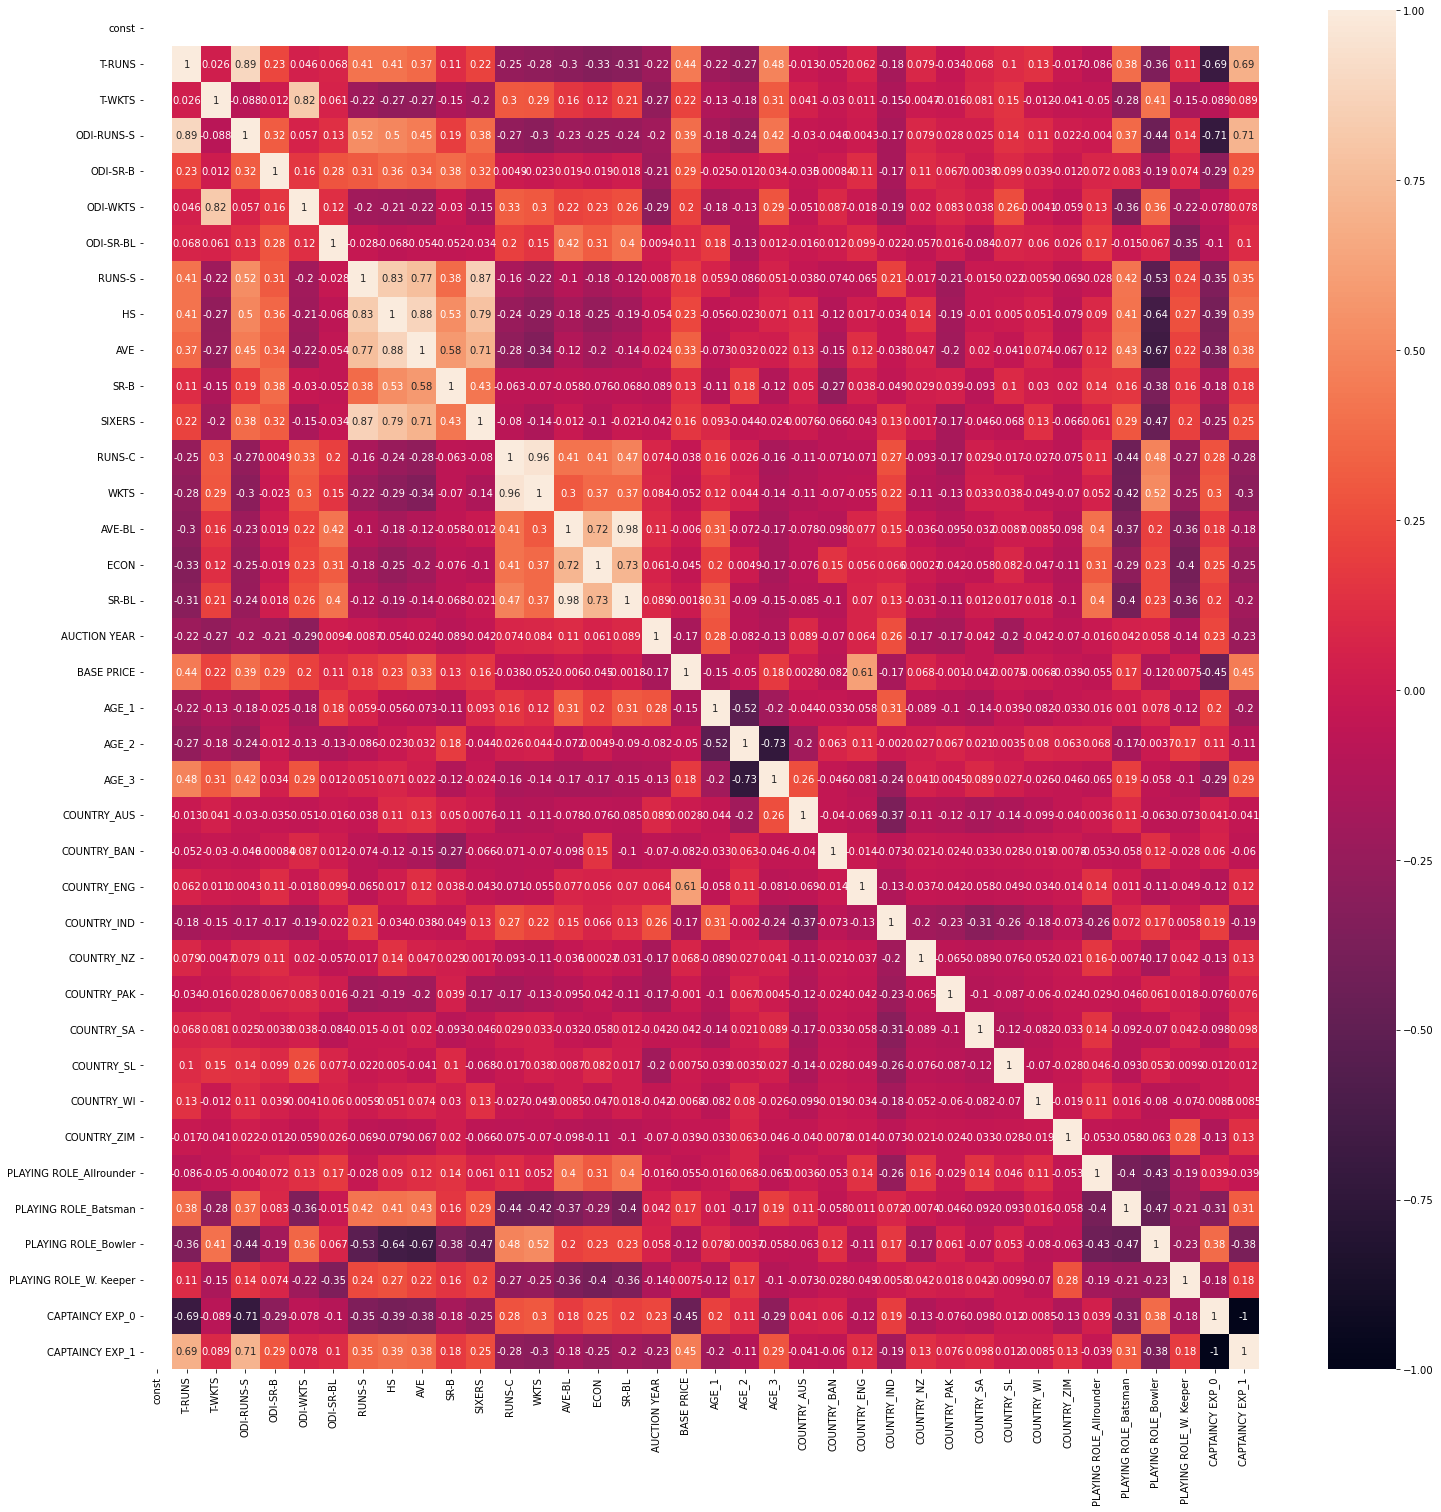

In [16]:
# Plotting heatmap of correlations

plt.figure(figsize=(25,25))
sns.heatmap(x_1.corr(),annot=True);

## Features to be dropped

T_RUNS <==> ODI_RUNS_S

T_WKTS <==> ODI_WKTS

ODI-RUNS_S <==> T-RUNS, CAPTAINCY EXP_1

RUNS-S, HS, AVE, SIXERS (3 to be dropped)

RUNS-C <==> WKTS

AVE-BL, ECON, SR-BL

In [17]:
features_to_drop_1 = ['ODI-RUNS-S','ODI-WKTS','HS', 'AVE', 'SIXERS','RUNS-C','AVE-BL','SR-BL']

In [18]:
len(features_to_drop_1)

8

In [19]:
features_2=list(set(x_1.columns)-set(features_to_drop_1))
features_2

['PLAYING ROLE_W. Keeper',
 'COUNTRY_PAK',
 'COUNTRY_SL',
 'COUNTRY_ZIM',
 'CAPTAINCY EXP_0',
 'COUNTRY_IND',
 'AGE_1',
 'PLAYING ROLE_Batsman',
 'RUNS-S',
 'BASE PRICE',
 'COUNTRY_WI',
 'ECON',
 'CAPTAINCY EXP_1',
 'PLAYING ROLE_Bowler',
 'WKTS',
 'COUNTRY_AUS',
 'AGE_3',
 'ODI-SR-BL',
 'COUNTRY_NZ',
 'PLAYING ROLE_Allrounder',
 'AUCTION YEAR',
 'COUNTRY_BAN',
 'AGE_2',
 'const',
 'COUNTRY_SA',
 'ODI-SR-B',
 'COUNTRY_ENG',
 'SR-B',
 'T-WKTS',
 'T-RUNS']

## Revisit the features

In [20]:
x_2 = x_1[features_2]

In [21]:
x_2.shape

(130, 30)

In [22]:
# Splitting 

from sklearn.model_selection import train_test_split

x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_2,y,test_size=0.2,random_state=10)

In [23]:
# Building the model

mlr_2 = sm.OLS(y_train_2,x_train_2)

In [24]:
mlr_2=mlr_2.fit()

In [25]:
# Summary

mlr_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
===============================================================================================
Model:                        OLS                       Adj. R-squared:              0.481     
Dependent Variable:           SOLD PRICE                AIC:                         2940.9295 
Date:                         2022-10-12 08:50          BIC:                         3007.0393 
No. Observations:             104                       Log-Likelihood:              -1445.5   
Df Model:                     24                        F-statistic:                 4.978     
Df Residuals:                 79                        Prob (F-statistic):          3.03e-08  
R-squared:                    0.602                     Scale:                       9.1031e+10
-----------------------------------------------------------------------------------------------
                            Coef.         Std.Err.      t    P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------------------
PLAYING ROLE_W. Keeper  -11034179.7689  6107392.3306 -1.8067 0.0746 -23190640.1158 1122280.5780
COUNTRY_PAK              -4769458.9335  2695353.1238 -1.7695 0.0807 -10134425.1248  595507.2578
COUNTRY_SL               -4784912.5524  2707310.3892 -1.7674 0.0810 -10173679.0850  603853.9803
COUNTRY_ZIM              -4766586.8998  2717589.1888 -1.7540 0.0833 -10175812.8713  642639.0717
CAPTAINCY EXP_0         -21886241.9568 12234371.2156 -1.7889 0.0775 -46238148.7119 2465664.7983
COUNTRY_IND              -4606449.0152  2745443.9235 -1.6779 0.0973 -10071118.4493  858220.4188
AGE_1                   -14420375.7577  8157719.5183 -1.7677 0.0810 -30657910.2860 1817158.7705
PLAYING ROLE_Batsman    -10891133.5407  6118141.6348 -1.7801 0.0789 -23068989.8423 1286722.7610
RUNS-S                        218.9946       78.2373  2.7991 0.0064        63.2672     374.7221
BASE PRICE                      2.3891        0.4999  4.7788 0.0000         1.3940       3.3841
COUNTRY_WI               -4774538.7183  2708570.3186 -1.7628 0.0818 -10165813.0777  616735.6410
ECON                        -1405.0237     7487.2703 -0.1877 0.8516    -16308.0624   13498.0150
CAPTAINCY EXP_1         -21739118.3273 12234147.0636 -1.7769 0.0794 -46090578.9191 2612342.2644
PLAYING ROLE_Bowler     -10905555.7943  6128886.9490 -1.7794 0.0790 -23104800.1089 1293688.5203
WKTS                          941.5070     1933.3600  0.4870 0.6276     -2906.7497    4789.7638
COUNTRY_AUS              -4827228.6044  2739810.5895 -1.7619 0.0820 -10280685.1675  626227.9587
AGE_3                   -14617407.2874  8153484.5689 -1.7928 0.0768 -30846512.3598 1611697.7849
ODI-SR-BL                    -505.3678     1554.8050 -0.3250 0.7460     -3600.1298    2589.3941
COUNTRY_NZ               -4789843.1701  2713607.0790 -1.7651 0.0814 -10191142.9504  611456.6102
PLAYING ROLE_Allrounder -10794491.1805  6116268.9253 -1.7649 0.0814 -22968619.9472 1379637.5863
AUCTION YEAR                47604.7875    26722.5648  1.7814 0.0787     -5585.1471  100794.7222
COUNTRY_BAN                    -0.0000        0.0000 -1.7831 0.0784        -0.0000       0.0000
AGE_2                   -14587577.2391  8157956.7654 -1.7881 0.0776 -30825583.9958 1650429.5176
const                   -43625360.2843 24468294.2952 -1.7829 0.0784 -92328281.8022 5077561.2337
COUNTRY_SA               -4775565.5824  2729067.2712 -1.7499 0.0840 -10207638.1055  656506.9407
ODI-SR-B                     -171.9336     1416.0301 -0.1214 0.9037     -2990.4709    2646.6038
COUNTRY_ENG              -5530776.8083  2784189.5900 -1.9865 0.0504 -11072567.5623   11013.9457
SR-B                          513.1881     1037.1153  0.4948 0.6221     -1551.1382    2577.5145
T-WKTS                         22.1848      306.7991  0.0723 0.9425      -588.4835     632.8530
T-RUNS                        -29.9983       15

In [28]:
X_2=x_2
var_inf_factor(X_2)

                    Feature  VIF_Value
0    PLAYING ROLE_W. Keeper        inf
1               COUNTRY_PAK        inf
2                COUNTRY_SL        inf
3               COUNTRY_ZIM        inf
4           CAPTAINCY EXP_0        inf
5               COUNTRY_IND        inf
6                     AGE_1        inf
7      PLAYING ROLE_Batsman        inf
8                    RUNS-S   2.454238
9                BASE PRICE   2.829560
10               COUNTRY_WI        inf
11                     ECON   1.778486
12          CAPTAINCY EXP_1        inf
13      PLAYING ROLE_Bowler        inf
14                     WKTS   1.953699
15              COUNTRY_AUS        inf
16                    AGE_3        inf
17                ODI-SR-BL   1.550311
18               COUNTRY_NZ        inf
19  PLAYING ROLE_Allrounder        inf
20             AUCTION YEAR   1.439778
21              COUNTRY_BAN        inf
22                    AGE_2        inf
23                    const   0.000000
24               COUNTRY_

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [29]:
# No multicollinearity



In [40]:
features_3=['RUNS-S','BASE PRICE']

In [41]:
X_3=X_2[features_3]

In [42]:
X_3

,RUNS-S,BASE PRICE
0,0,50000
1,0,50000
2,167,200000
3,58,100000
4,1317,100000
...,...,...
125,49,50000
126,3,225000
127,1237,400000
128,99,200000


In [47]:
# Splitting
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(
    X_3,y,train_size=0.8, random_state=10)

In [48]:
X_train_3.shape,X_test_3.shape,y_train_3.shape,y_test_3.shape

((104, 2), (26, 2), (104,), (26,))

In [50]:
# Buliding the model
mlr_3=sm.OLS(y_train_3,X_train_3)

In [51]:
mlr_3=mlr_3.fit()

In [52]:
mlr_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.762     
Dependent Variable:     SOLD PRICE       AIC:                         2938.9851 
Date:                   2022-10-12 09:12 BIC:                         2944.2739 
No. Observations:       104              Log-Likelihood:              -1467.5   
Df Model:               2                F-statistic:                 167.8     
Df Residuals:           102              Prob (F-statistic):          5.57e-33  
R-squared (uncentered): 0.767            Scale:                       1.0769e+11
------------------------------------------------------------------------------------
                Coef.       Std.Err.       t        P>|t|       [0.025       0.975] 
------------------------------------------------------------------------------------
RUNS-S         289.6304      49.5265     5.8480     0.0000     191.3949     387.8659
BASE PRICE       1.8294       0.1849     9.8963     0.0000       1.4627       2.1960
--------------------------------------------------------------------------------
Omnibus:                   16.006            Durbin-Watson:               1.928 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            18.853
Skew:                      0.862             Prob(JB):                    0.000 
Kurtosis:                  4.175             Condition No.:               343   
================================================================================

"""

## Residual Analysis

In [53]:
mlr_3.resid

19    -532071.340056
14    -328968.415292
91    -211194.841913
35    -232243.387237
20    -125564.927490
           ...      
64      63191.142226
15     252128.216833
100    -94522.819814
125    644339.308580
9      -29989.584282
Length: 104, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

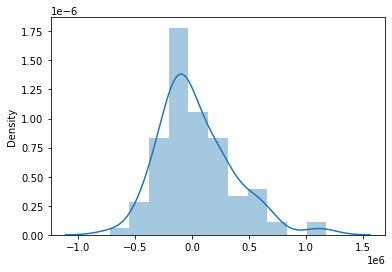

In [54]:
sns.distplot(mlr_3.resid)

## Prob-prob plot

In [55]:
def prob_prob_plot(model):
    probplot=sm.ProbPlot(model.resid)
    probplot.ppplot(line='45')
    plt.show();

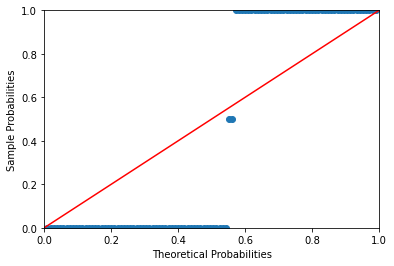

In [56]:
prob_prob_plot(mlr_2)

## Homoscedasticity

In [57]:
def standard(data):
    return (data-data.mean())/data.std()

In [58]:
def residual_plot(model):
    plt.scatter(standard(model.fittedvalues),standard(model.resid))
    plt.xlabel('Standardised Fitted Values')
    plt.ylabel('Standardised Residual Values')
    plt.title(' Residual Plot');

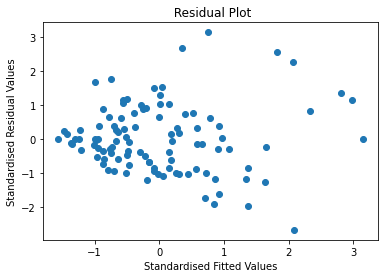

In [59]:
residual_plot(mlr_2)

## Outlier detection

ZScore

Cooks distance

Leverage Distance

## zscore

In [61]:
from scipy.stats import zscore

z_score=zscore(X_3)
z_score

,RUNS-S,BASE PRICE
0,-0.839099,-0.932616
1,-0.839099,-0.932616
2,-0.566604,0.050943
3,-0.744460,-0.604763
4,1.309858,-0.604763
...,...,...
125,-0.759145,-0.932616
126,-0.834203,0.214870
127,1.179322,1.362356
128,-0.677560,0.050943


In [64]:
z_score[z_score>3].count()

RUNS-S        0
BASE PRICE    2
dtype: int64

In [65]:
z_score[z_score<-3].count()

RUNS-S        0
BASE PRICE    0
dtype: int64

Note: There are 2 outliers corresponding to value of BASE PRICE :
|z_score|>3

## Cooks distance

In [67]:
def cooks_dist(model):
    model_influence=model.get_influence()
    (c,_)=model_influence.cooks_distance
    plt.stem(np.arange(len(X_train_3)),c)
    plt.xlabel('Observation no')
    plt.ylabel(' Cooks distance')
    plt.show();

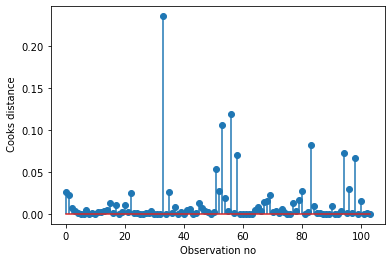

In [68]:
cooks_dist(mlr_3)

Note: if cooks distance> 1 means, that is an outlier

## Leverage distance

In [70]:
n=104 # No observations in the training

k= 2 # No of features in the model

lev_cutoff=(3*(k+1)/n)

print('Leverage cut off:',lev_cutoff)


Leverage cut off: 0.08653846153846154


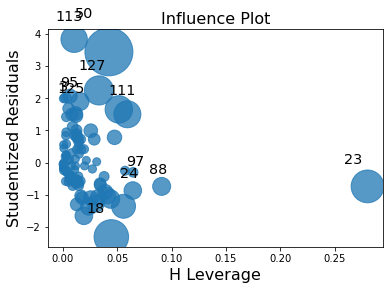

In [71]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(mlr_3);

In [73]:
# 2 outliers - ob 88 and 23

X_train_3.iloc[88]

RUNS-S            0
BASE PRICE    50000
Name: 0, dtype: int64

In [74]:
X_train_3['BASE PRICE'].min(), X_train_3['BASE PRICE'].max()

(20000, 950000)

In [75]:
X_train_3['RUNS-S'].min(), X_train_3['RUNS-S'].max()

(0, 2254)

In [76]:
X_train_3.iloc[23]

RUNS-S             4
BASE PRICE    150000
Name: 21, dtype: int64

In [77]:
# Dropping
X_4=X_3.drop([88,23])

In [78]:
X_4.shape

(128, 2)

In [80]:
# Dropping 

y1=y.drop([88,23])

In [82]:
y1.shape

(128,)

In [84]:
X_train_4,X_test_4,y_train_4,y_test_4=train_test_split(
    X_4,y1,train_size=0.8, random_state=10)

In [85]:
mlr_4=sm.OLS(y_train_4,X_train_4)

In [86]:
mlr_4=mlr_4.fit()

In [87]:
mlr_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.753     
Dependent Variable:     SOLD PRICE       AIC:                         2886.6249 
Date:                   2022-10-12 09:41 BIC:                         2891.8749 
No. Observations:       102              Log-Likelihood:              -1441.3   
Df Model:               2                F-statistic:                 156.1     
Df Residuals:           100              Prob (F-statistic):          1.77e-31  
R-squared (uncentered): 0.757            Scale:                       1.1213e+11
------------------------------------------------------------------------------------
                Coef.       Std.Err.       t        P>|t|       [0.025       0.975] 
------------------------------------------------------------------------------------
RUNS-S         340.0613      54.4170     6.2492     0.0000     232.0996     448.0230
BASE PRICE       1.5606       0.1776     8.7851     0.0000       1.2082       1.9131
--------------------------------------------------------------------------------
Omnibus:                   8.520             Durbin-Watson:                2.077
Prob(Omnibus):             0.014             Jarque-Bera (JB):             8.906
Skew:                      0.534             Prob(JB):                     0.012
Kurtosis:                  3.977             Condition No.:                397  
================================================================================

"""

Continue the tests....

# Predicting the model

In [89]:
y_pred= mlr_4.predict(X_test_4)

In [90]:
y_pred

106    2.578986e+05
97     9.057153e+05
42     8.903873e+05
125    9.469443e+04
117    3.396707e+05
60     6.924056e+05
54     3.299916e+05
64     2.193143e+05
46     3.223275e+04
40     2.783022e+05
2      3.689159e+05
48     3.498725e+05
122    7.696150e+05
53     1.587833e+05
39     4.634783e+05
1      7.803143e+04
85     1.141875e+05
57     3.338896e+05
10     5.974371e+05
59     5.960516e+05
84     3.621147e+05
101    3.298089e+05
44     1.019362e+06
71     2.694859e+05
27     6.914514e+05
49     3.940805e+05
dtype: float64

## Performance of the model


In [92]:
from sklearn.metrics import r2_score, mean_squared_error

r2=r2_score(y_test_4,y_pred)
print(' R2 value:',r2)

mse= mean_squared_error(y_test_4,y_pred)

rmse =np.sqrt(mse)
print(' The RMSE:', rmse)

 R2 value: 0.10139730948481451
 The RMSE: 276546.0338651926


Remark:

The model does not look great.

We need to refine



## Transformation of target

In [93]:
y.min(),y.max()

(20000, 1800000)

In [94]:
y_2= np.sqrt(y)

In [95]:
y_2.min(),y_2.max()

(141.4213562373095, 1341.640786499874)

In [97]:
# Use this for the splitting

X_train,X_test,y_train,y_test=train_test_split(x_1,y_2,test_size=0.2, random_state=10)

In [98]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((104, 38), (26, 38), (104,), (26,))

In [99]:
mlr_sq=sm.OLS(y_train,X_train)
mlr_sq=mlr_sq.fit()

In [100]:
mlr_sq.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                    OLS                    Adj. R-squared:           0.502    
Dependent Variable:       SOLD PRICE             AIC:                      1419.9093
Date:                     2022-10-12 09:53       BIC:                      1507.1742
No. Observations:         104                    Log-Likelihood:           -676.95  
Df Model:                 32                     F-statistic:              4.243    
Df Residuals:             71                     Prob (F-statistic):       2.04e-07 
R-squared:                0.657                  Scale:                    38646.   
------------------------------------------------------------------------------------
                           Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
------------------------------------------------------------------------------------
const                   -19149.6537 16475.0156 -1.1623 0.2490 -51999.9018 13700.5943
T-RUNS                      -0.0224     0.0179 -1.2536 0.2141     -0.0580     0.0132
T-WKTS                      -0.5509     0.3773 -1.4601 0.1487     -1.3032     0.2014
ODI-RUNS-S                   0.0033     0.0191  0.1724 0.8636     -0.0348     0.0413
ODI-SR-B                    -0.4059     0.9656 -0.4203 0.6755     -2.3312     1.5194
ODI-WKTS                     0.9766     0.4940  1.9768 0.0519     -0.0085     1.9617
ODI-SR-BL                   -1.0496     1.1229 -0.9347 0.3531     -3.2887     1.1894
RUNS-S                       0.1529     0.1091  1.4014 0.1655     -0.0647     0.3705
HS                          -1.3127     1.6371 -0.8018 0.4253     -4.5770     1.9517
AVE                          2.1950     5.1460  0.4265 0.6710     -8.0658    12.4557
SR-B                        -0.0508     0.7806 -0.0651 0.9483     -1.6073     1.5057
SIXERS                       0.9347     2.3633  0.3955 0.6937     -3.7777     5.6471
RUNS-C                       0.2093     0.1660  1.2607 0.2115     -0.1217     0.5404
WKTS                        -1.8624     4.0057 -0.4649 0.6434     -9.8495     6.1246
AVE-BL                       6.2992     6.4752  0.9728 0.3339     -6.6120    19.2103
ECON                        -4.9413     6.2978 -0.7846 0.4353    -17.4987     7.6161
SR-BL                       -8.0440     8.9037 -0.9034 0.3693    -25.7974     9.7094
AUCTION YEAR                21.0882    17.9942  1.1719 0.2451    -14.7913    56.9677
BASE PRICE                   0.0014     0.0004  3.8099 0.0003      0.0006     0.0021
AGE_1                    -6312.9940  5495.7342 -1.1487 0.2545 -17271.1768  4645.1887
AGE_2                    -6415.7263  5491.9253 -1.1682 0.2466 -17366.3144  4534.8617
AGE_3                    -6420.9334  5487.9525 -1.1700 0.2459 -17363.5998  4521.7330
COUNTRY_AUS              -2110.3476  1845.0711 -1.1438 0.2566  -5789.3150  1568.6197
COUNTRY_BAN                  0.0000     0.0000  1.1671 0.2471     -0.0000     0.0000
COUNTRY_ENG              -2492.0016  1873.9361 -1.3298 0.1878  -6228.5242  1244.5209
COUNTRY_IND              -2015.8684  1850.2727 -1.0895 0.2796  -5705.2073  1673.4705
COUNTRY_NZ               -2034.6691  1827.6507 -1.1133 0.2693  -5678.9011  1609.5630
COUNTRY_PAK              -2077.3726  1811.8686 -1.1465 0.2554  -5690.1359  1535.3907
COUNTRY_SA               -2070.7888  1839.5895 -1.1257 0.2641  -5738.8262  1597.2485
COUNTRY_SL               -2113.9846  1818.2910 -1.1626 0.2489  -5739.5539  1511.5847
COUNTRY_WI               -2066.3942  1828.9117 -1.1298 0.2623  -5713.1406  1580.3521
COUNTRY_ZIM              -2168.2267  1831.2526 -1.1840 0.2404  -5819.6408  1483.1874
PLAYING ROLE_Allrounder  -4795.2781  4118.7751 -1.1642 0.2482 -13007.8824  3417.3262
PLAYING ROLE_Batsman     -4731.9322  4119.0338 -1.1488 0.2545 -12945.0523  3481.1878
PLAYING ROLE_Bowler      -4814.8903  4127.1771 -1.1666 0.2473 -13044

In [101]:
var_inf_factor(x_1)

                    Feature  VIF_Value
0                     const   0.000000
1                    T-RUNS   9.233542
2                    T-WKTS   6.522453
3                ODI-RUNS-S  11.067128
4                  ODI-SR-B   1.703841
5                  ODI-WKTS   7.048664
6                 ODI-SR-BL   1.707550
7                    RUNS-S   9.948044
8                        HS   8.602278
9                       AVE   7.467939
10                     SR-B   2.293498
11                   SIXERS   6.425581
12                   RUNS-C  22.310115
13                     WKTS  20.896087
14                   AVE-BL  45.182628
15                     ECON   2.981483
16                    SR-BL  45.596075
17             AUCTION YEAR   1.508571
18               BASE PRICE   3.347050
19                    AGE_1        inf
20                    AGE_2        inf
21                    AGE_3        inf
22              COUNTRY_AUS        inf
23              COUNTRY_BAN        inf
24              COUNTRY_E

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


continue....

In [102]:
mlr_4.params

RUNS-S        340.061296
BASE PRICE      1.560629
dtype: float64

The final model:

SOLD PRICE =BASE_PRICE * 1.560629  + RUNS-S * 340.061296

